In [18]:
#  Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint

In [19]:
#  Importing API key
from api_keys import bea_api_key

base_url = "https://apps.bea.gov/api/data/"

In [20]:
# BEA Client Class for exploratory analysis
class BEAClientExplore:

  def __init__(self, api_key):
    self.api_key = api_key
    self.base_url = base_url
  
  def make_request(self, params):
    params['UserID'] = self.api_key
    params['ResultFormat'] = 'JSON'

    try:
      response = requests.get(self.base_url, params=params)
      response.raise_for_status()
      return response.json()
    except requests.exceptions.RequestException as e:
      print(f"API request failed: {e}")
      return None
  
  def get_dataset_list(self):
    
    '''returns all datasets within the API'''

    params = {
        'method': 'GETDATASETLIST'
    }
    data = self.make_request(params)
    
    try:
      datasets = data['BEAAPI']['Results']['Dataset']
      print("Available BEA Datasets:")
      print('-' * 50)
      for dataset in datasets:
        print(f"• {dataset['DatasetName']}: {dataset['DatasetDescription']}")
      return datasets
    except KeyError as e:
      print(f"Unexpected API response structure: {e}")
      return None


  def get_parameter_list(self, datasetname):

    '''returns all parameters within a dataset and whether they are required'''

    params = {
        'method': 'GetParameterList',
        'datasetname': datasetname
    }
    data = self.make_request(params)
    if data is None:
      return None
            
    try:
      parameters = data['BEAAPI']['Results']['Parameter']
      print(f"Parameters for {datasetname}:")
      print("-" * 50)
      for param in parameters:
          print(f"• {param['ParameterName']}: {param['ParameterDescription']}")
          if 'ParameterDataType' in param:
              print(f"  Data Type: {param['ParameterDataType']}")
          if 'ParameterIsRequiredFlag' in param:
              required = "Required" if param['ParameterIsRequiredFlag'] == "1" else "Optional"
              print(f"  {required}")
          print()
      return parameters
    except KeyError as e:
        print(f"Unexpected API response structure: {e}")
        return None
  

  def get_parameter_values(self, datasetname, parametername):

    '''returns a dictionary with the names and descriptions for a particular 
    dataset and parameter'''

    params = {
        'method': 'GetParameterValues',
        'datasetname': datasetname,
        'ParameterName': parametername
    }
    data = self.make_request(params)
    if data is None:
      return None

    try:
      values = data['BEAAPI']['Results']['ParamValue']
      print(f"Values for {parametername}:")
      print("-" * 50)
    
      for value in values:
        key = value.get('Key', 'N/A')
        desc = value.get('Desc', 'N/A')
        print(f"• {key}: {desc}")
    
      return values
    
    except KeyError as e:
      print(f"Unexpected API response structure: {e}")
      return None
            

# Initialize the client
explore_client = BEAClientExplore(bea_api_key)
print("BEA Client initialized")

BEA Client initialized


In [21]:
# Printing List of Datasets
datasetlist_response = explore_client.get_dataset_list()
print(datasetlist_response)

Available BEA Datasets:
--------------------------------------------------
• NIPA: Standard NIPA tables
• NIUnderlyingDetail: Standard NI underlying detail tables
• MNE: Multinational Enterprises
• FixedAssets: Standard Fixed Assets tables
• ITA: International Transactions Accounts
• IIP: International Investment Position
• InputOutput: Input-Output Data
• IntlServTrade: International Services Trade
• IntlServSTA: International Services Supplied Through Affiliates
• GDPbyIndustry: GDP by Industry
• Regional: Regional data sets
• UnderlyingGDPbyIndustry: Underlying GDP by Industry
• APIDatasetMetaData: Metadata about other API datasets
[{'DatasetName': 'NIPA', 'DatasetDescription': 'Standard NIPA tables'}, {'DatasetName': 'NIUnderlyingDetail', 'DatasetDescription': 'Standard NI underlying detail tables'}, {'DatasetName': 'MNE', 'DatasetDescription': 'Multinational Enterprises'}, {'DatasetName': 'FixedAssets', 'DatasetDescription': 'Standard Fixed Assets tables'}, {'DatasetName': 'ITA', 

In [22]:
# Printing GDPbyIndustry Parameters
paramlistresponse = explore_client.get_parameter_list('GDPbyIndustry')
print(paramlistresponse)

Parameters for GDPbyIndustry:
--------------------------------------------------
• Frequency: A - Annual, Q-Quarterly
  Data Type: string
  Required

• Industry: List of industries to retrieve (ALL for All)
  Data Type: string
  Required

• TableID: The unique GDP by Industry table identifier (ALL for All)
  Data Type: integer
  Required

• Year: List of year(s) of data to retrieve (ALL for All)
  Data Type: integer
  Required

[{'ParameterName': 'Frequency', 'ParameterDataType': 'string', 'ParameterDescription': 'A - Annual, Q-Quarterly', 'ParameterIsRequiredFlag': '1', 'ParameterDefaultValue': '', 'MultipleAcceptedFlag': '1', 'AllValue': 'ALL'}, {'ParameterName': 'Industry', 'ParameterDataType': 'string', 'ParameterDescription': 'List of industries to retrieve (ALL for All)', 'ParameterIsRequiredFlag': '1', 'ParameterDefaultValue': '', 'MultipleAcceptedFlag': '1', 'AllValue': 'ALL'}, {'ParameterName': 'TableID', 'ParameterDataType': 'integer', 'ParameterDescription': 'The unique GDP 

In [23]:
# Printing GDPbyIndustry Table Names
paramvalueresponse = explore_client.get_parameter_values('GDPbyIndustry', 'TableID')
print(paramvalueresponse)

Values for TableID:
--------------------------------------------------
• 1: Value Added by Industry (A) (Q)
• 5: Value added by Industry as a Percentage of Gross Domestic Product (A) (Q)
• 6: Components of Value Added by Industry (A)
• 7: Components of Value Added by Industry as a Percentage of Value Added (A)
• 8: Chain-Type Quantity Indexes for Value Added by Industry (A) (Q)
• 9: Percent Changes in Chain-Type Quantity Indexes for Value Added by Industry (A) (Q)
• 10: Real Value Added by Industry (A) (Q)
• 11: Chain-Type Price Indexes for Value Added by Industry (A) (Q)
• 12: Percent Changes in Chain-Type Price Indexes for Value Added by Industry (A) (Q)
• 13: Contributions to Percent Change in Real Gross Domestic Product by Industry (A) (Q)
• 14: Contributions to Percent Change in the Chain-Type Price Index for Gross Domestic Product by Industry (A) (Q)
• 15: Gross Output by Industry (A) (Q)
• 16: Chain-Type Quantity Indexes for Gross Output by Industry (A) (Q)
• 17: Percent Changes

Data Processing

In [24]:
# Cleaner BEA Client for Preliminary Graphs
class BEAClientPrelim:

  def __init__(self, api_key):
    self.api_key = api_key
    self.base_url = base_url

  def make_request(self, params):
    params['UserID'] = self.api_key
    params['ResultFormat'] = 'JSON'

    try:
      response = requests.get(self.base_url, params=params)
      response.raise_for_status()
      return response.json()
    except requests.exceptions.RequestException as e:
      print(f"API request failed: {e}")
      return None

  def get_gdp_change_data(self, years=['2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025']):
    params = {
        'method': 'GetData',
        'datasetname': 'NIPA',
        'TableName': 'T10101',
        'Frequency': 'Q',
        'Year': ','.join(years)
    }
    return self.make_request(params)

  def get_realgdp_data(self, years=['2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025']):
    params = {
        'method': 'GetData',
        'datasetname': 'NIPA',
        'TableName': 'T10106',
        'Frequency': 'Q',
        'Year': ','.join(years)
        }
    return self.make_request(params)


# Initialize the client
prelim_client = BEAClientPrelim(bea_api_key)
print("BEA Client initialized")

BEA Client initialized


In [25]:
# data = prelim_client.get_gdp_data()
# pprint.pprint(data)

In [26]:
def process_gdp_data(raw_data):
  if not raw_data or 'BEAAPI' not in raw_data:
    print('No Data Received. Invalid Input')
    return None
  
  try:
    results = raw_data['BEAAPI']['Results']['Data']

    processed_data = []
    for item in results:
      try:
        value = float(item['DataValue'].replace(',', ''))
      except (ValueError, AttributeError):
        continue
      
      processed_data.append({
          'Date': item['TimePeriod'],
          'GDP(%Change)': value,
          'Description': item['LineDescription'],
          'TableName': item.get('TableName', 'Unknown')
      })
    qgdp_change_df = pd.DataFrame(processed_data)

    if qgdp_change_df.empty:
      print('No Data To Show')
      return None
    
    # separate Q from Y
    qgdp_change_df['Year'] = qgdp_change_df['Date'].str[:4].astype(int)
    qgdp_change_df['Quarter'] = qgdp_change_df['Date'].str[5:]
    qgdp_change_df['Datetime'] = pd.to_datetime(qgdp_change_df['Date'])
    qgdp_change_df = qgdp_change_df.sort_values('Datetime')

    return qgdp_change_df

  except Exception as e:
    print(f"Error processing data: {e}")
    return None

In [28]:
gdp_response = prelim_client.get_gdp_change_data()
gdp_df = process_gdp_data(gdp_response)
gdp_df.reset_index(drop=True, inplace=True)
gdp_df

,Date,GDP(%Change),Description,TableName,Year,Quarter,Datetime
0,2018Q1,3.3,Gross domestic product,T10101,2018,1,2018-01-01
1,2018Q1,-1.1,State and local,T10101,2018,1,2018-01-01
2,2018Q1,3.7,Goods,T10101,2018,1,2018-01-01
3,2018Q1,8.1,Nondefense,T10101,2018,1,2018-01-01
4,2018Q1,5.3,Durable goods,T10101,2018,1,2018-01-01
...,...,...,...,...,...,...,...
745,2025Q2,6.4,Intellectual property products,T10101,2025,2,2025-04-01
746,2025Q2,-5.4,Services,T10101,2025,2,2025-04-01
747,2025Q2,3.0,State and local,T10101,2025,2,2025-04-01
748,2025Q2,2.2,Goods,T10101,2025,2,2025-04-01


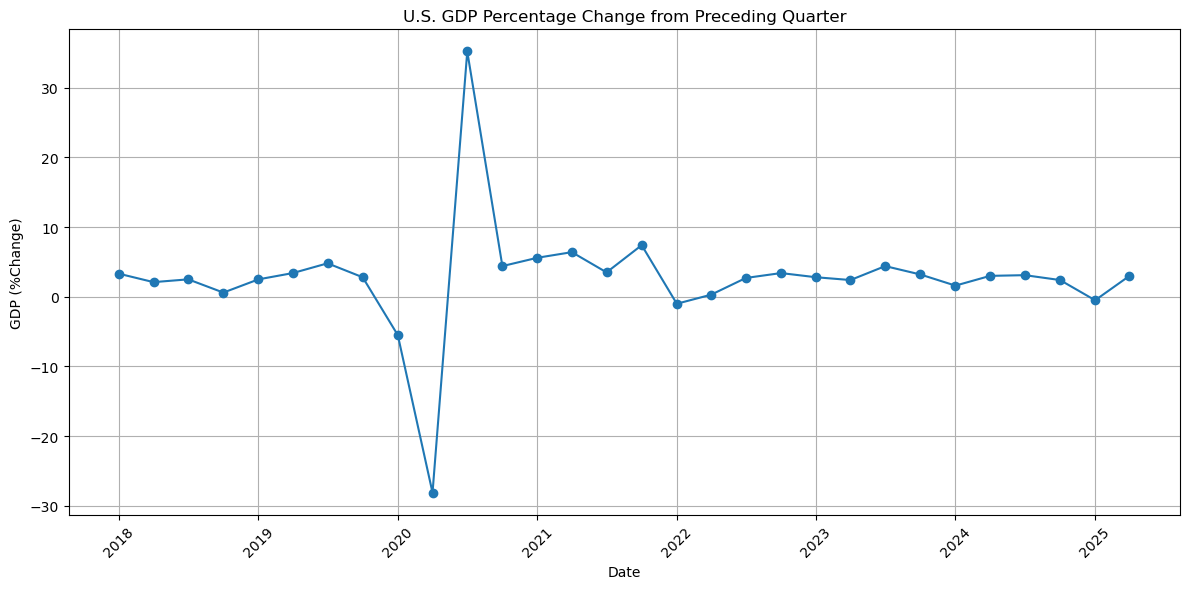

In [29]:
specific_desc = "Gross domestic product"
filtered_df = gdp_df[gdp_df['Description'] == specific_desc]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Datetime'], filtered_df['GDP(%Change)'], marker='o')
plt.title(f'U.S. GDP Percentage Change from Preceding Quarter')
plt.xlabel('Date')
plt.ylabel('GDP (%Change)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/p1/75d6qxbd65v17kwgc_pn1k7w0000gn/T/ipykernel_17561/1090707939.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(filtered_df['Date'], rotation=45)


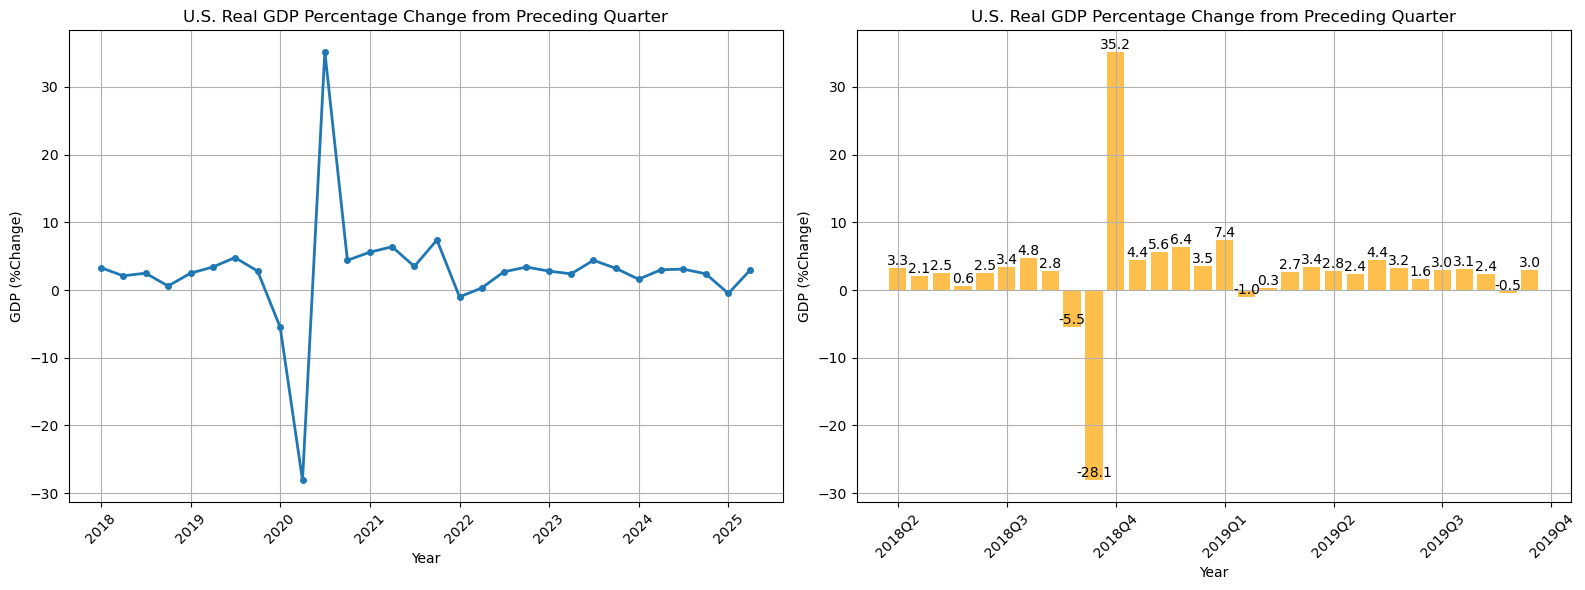

In [30]:
# remake chart with fig, ax =

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(filtered_df['Datetime'], filtered_df['GDP(%Change)'],
         marker='o', linewidth=2, markersize=4)
ax1.set_title(f'U.S. Real GDP Percentage Change from Preceding Quarter')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP (%Change)')
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)


bars = ax2.bar(range(len(filtered_df)), filtered_df['GDP(%Change)'],
        color='orange', alpha=0.7)
ax2.set_title(f'U.S. Real GDP Percentage Change from Preceding Quarter')
ax2.set_xlabel('Year')
ax2.set_ylabel('GDP (%Change)')
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',  # Format to 1 decimal place
             ha='center', va='bottom')

ax2.grid(True)
# ax2.tick_params(axis='x', rotation=45)
ax2.set_xticklabels(filtered_df['Date'], rotation=45)

plt.tight_layout()
plt.show()

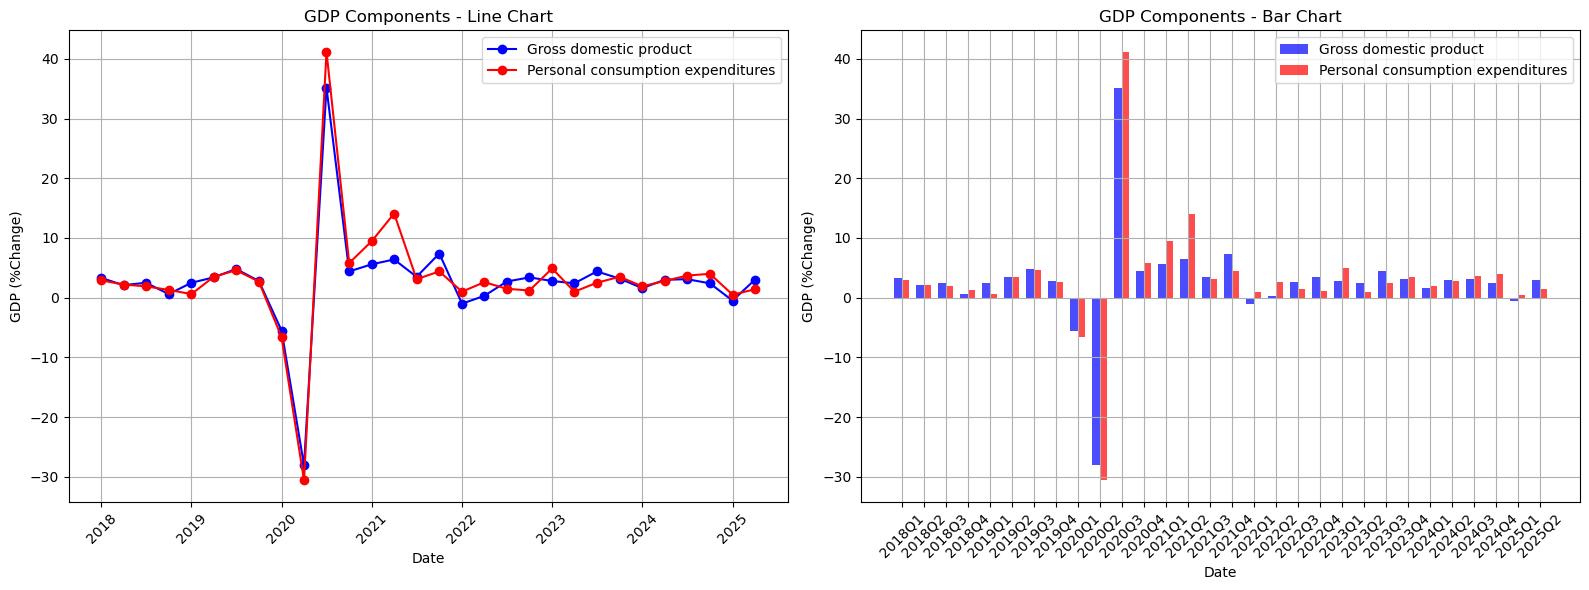

In [31]:
descriptions_to_plot = [
    "Gross domestic product",
    "Personal consumption expenditures"
]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

colors = ['blue', 'red', 'green', 'orange']

# Line chart
for i, desc in enumerate(descriptions_to_plot):
  filtered_df = gdp_df[gdp_df['Description'] == desc]
  ax1.plot(filtered_df['Datetime'], filtered_df['GDP(%Change)'],
             marker='o', label=desc, color=colors[i])

ax1.set_title('GDP Components - Line Chart')
ax1.set_xlabel('Date')
ax1.set_ylabel('GDP (%Change)')
ax1.legend()
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

# Bar chart (grouped bars)
x_pos = range(len(filtered_df))
bar_width = 0.35

for i, desc in enumerate(descriptions_to_plot):
  filtered_df = gdp_df[gdp_df['Description'] == desc]
  ax2.bar([x + bar_width * i for x in x_pos], filtered_df['GDP(%Change)'],
            bar_width, label=desc, color=colors[i], alpha=0.7)

ax2.set_title('GDP Components - Bar Chart')
ax2.set_xlabel('Date')
ax2.set_ylabel('GDP (%Change)')
ax2.legend()
ax2.grid(True)
ax2.set_xticks([x + bar_width/2 for x in x_pos])
ax2.set_xticklabels(filtered_df['Date'], rotation=45)

plt.tight_layout()
plt.show()

In [32]:
# data = prelim_client.get_realgdp_data()
# pprint.pprint(data)